# Diabetes Dataset Analysis
This notebook analyzes the Pima Indians Diabetes dataset. The primary goal is to predict whether a patient is likely to develop diabetes based on diagnostic measurements. This involves exploring the dataset, preprocessing the data, and applying machine learning models

Key libraries include `pandas` for data manipulation, `matplotlib` and `seaborn` for visualization, and `scikit-learn` for building and evaluating predictive models.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Data Exploration

### 1.1 Load the Data and Inspect the diabetes data

In [3]:
csv_path = "../data/diabetes.csv"
data_diabetes = pd.read_csv(csv_path, sep=";")

data_diabetes.shape
data_diabetes.info()
data_diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10,115,0,0,0,35.3,0.134,29,0
1,7,100,0,0,0,30.0,0.484,32,1
2,7,105,0,0,0,0.0,0.305,24,0
3,2,84,0,0,0,0.0,0.304,21,0
4,0,131,0,0,0,43.2,0.270,26,1


We load our diabetes dataset and perform initial inspection to understand its structure and contents.

### 2.3 Data Analysis Sect

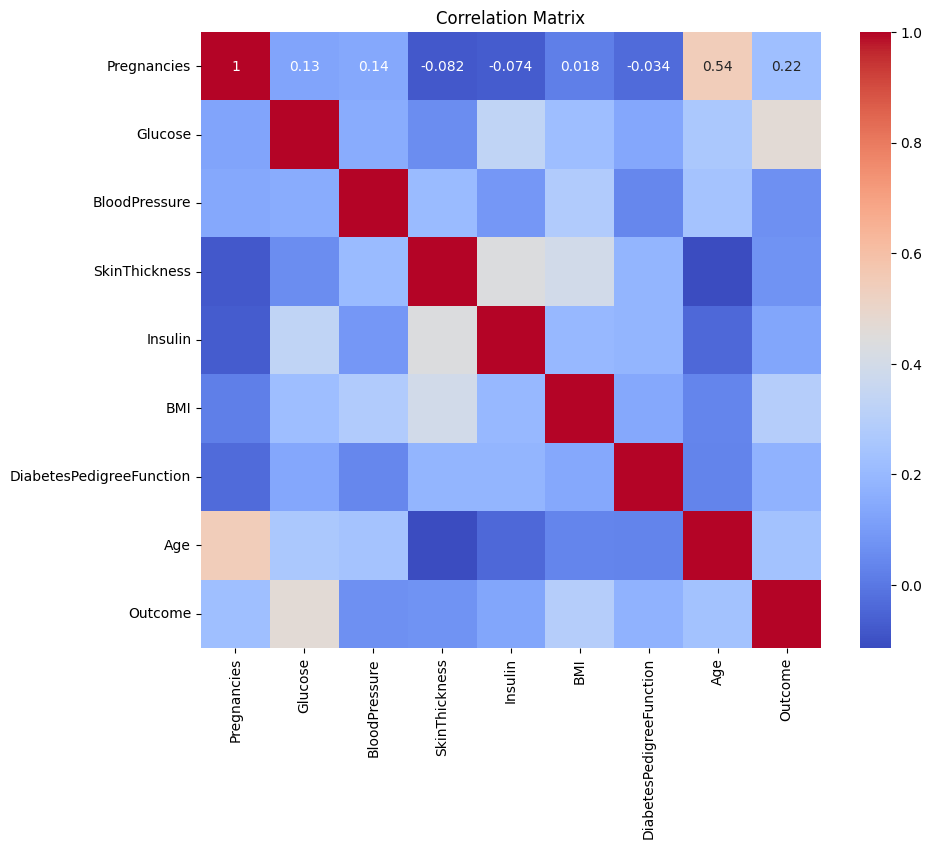

In [4]:
# Statistical summary
data_diabetes.describe()

# Check the missing values
data_diabetes.isnull().sum()

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We examine statistical measures and identify potential data quality issues, focusing on missing values and unusual patterns. Correlation matrix visualisation gives us an understanding of the relationships between variables, highlighting important links that may influence diabetes prediction.

## 3 Data Preprocessing

### 3.1 Fill Missing Values with median of each columns

In [5]:
# Handle missing values
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Fill missing values with median
for column in columns_to_process:
    data_diabetes[column] = data_diabetes[column].replace(0, data_diabetes[column].median())

Zero values are physiologically impossible in certain medical measurements. We treat these by using the median of each characteristic.

In [6]:
check_zeros = data_diabetes.eq(0).sum()
check_zeros

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 3.2 Feature Scaling

In [11]:
# Prepare features and target
X = data_diabetes.drop('Outcome', axis=1)
y = data_diabetes['Outcome']
# Scale features
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)


Standardising features ensures that all variables contribute equally to the model and improves convergence.

## 4. Model Building

### 4.1 Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

We split our data into training and testing sets to properly evaluate model performance.

### 4.2 Models Training

In [13]:
# Train multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} Results:")
    print(classification_report(y_test, model.predict(X_test)))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        97
           1       0.73      0.56      0.63        57

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        97
           1       0.61      0.60      0.60        57

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154


Random Forest Results:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        97
           1       0.64      0.56      0.60        57

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       

We implement different models to evaluate each model, in medical diagnosis tasks.

### 4.3 Model Comparison

In [14]:
# Create comparison table of model performances
model_scores = {}
for name, model in models.items():
    model_scores[name] = model.score(X_test, y_test)
    
# Display scores as a DataFrame
scores_data_diabetes = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
print(scores_data_diabetes)

                     Accuracy
Logistic Regression  0.759740
Decision Tree        0.707792
Random Forest        0.720779


We compare the performance of all three models (Logistic Regression, Decision Tree, and Random Forest) to identify the most effective classifier for our diabetes prediction task.

### 4.4 Best Model Analysis

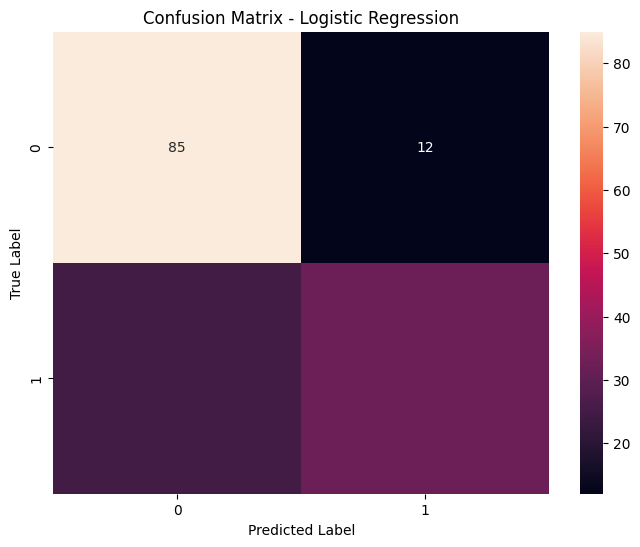

In [16]:
from sklearn.metrics import confusion_matrix
# Select best performing model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

# Detailed evaluation of best model
y_pred = best_model.predict(X_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance (if Random Forest or Decision Tree is best)
if hasattr(best_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'features': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nFeature Importances:")
    print(importances)

We analyze the best performing model in detail, examining its confusion matrix and feature importances (if applicable). This helps us understand which medical measurements are most crucial for diabetes prediction.

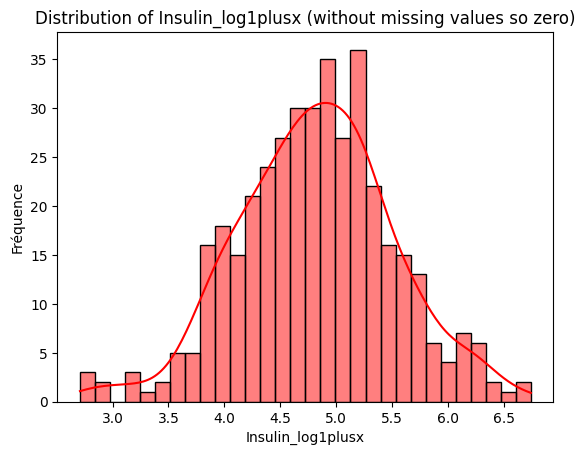

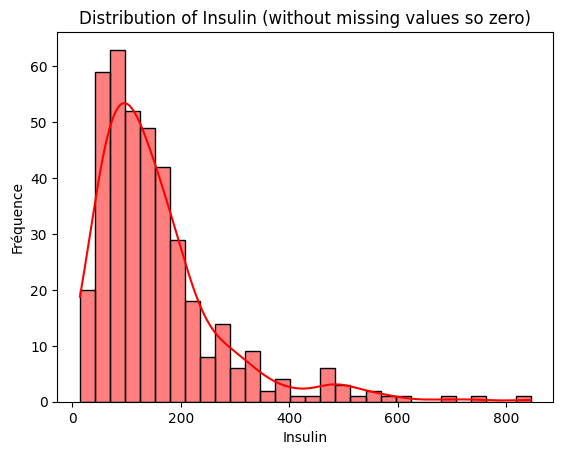

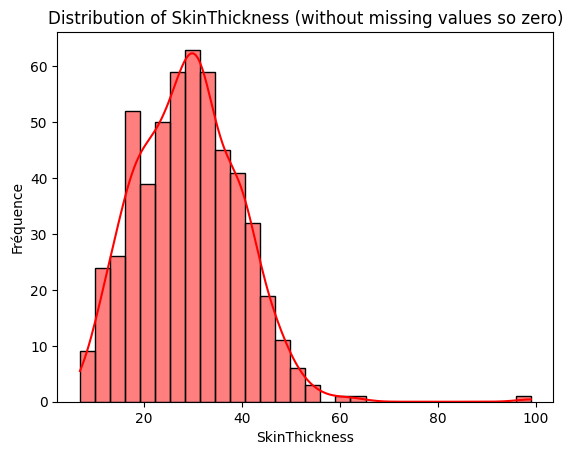

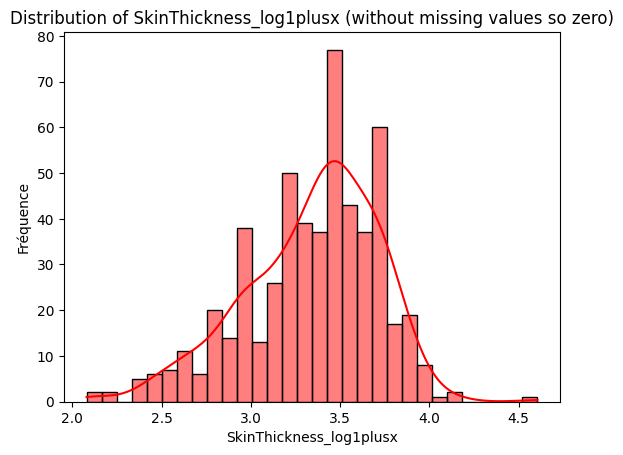

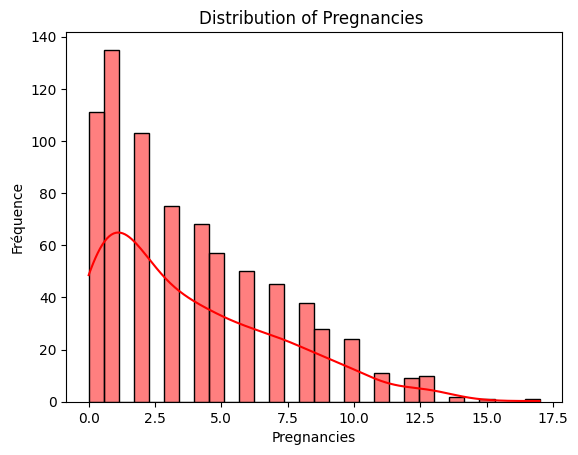

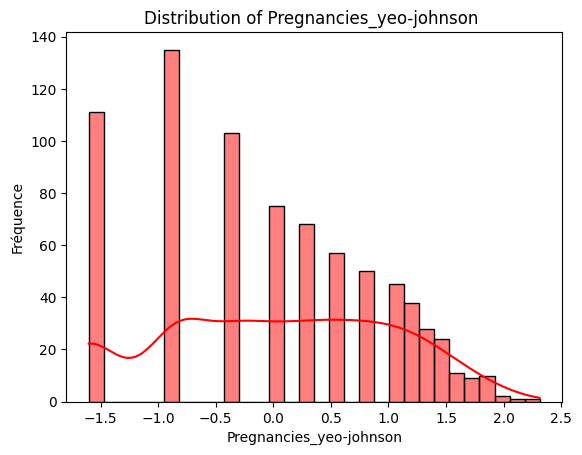

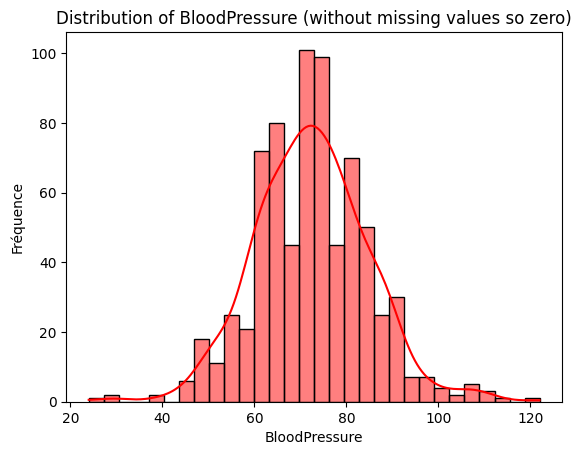

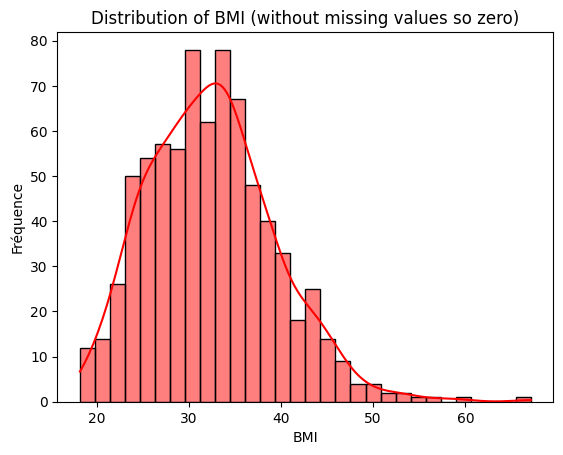

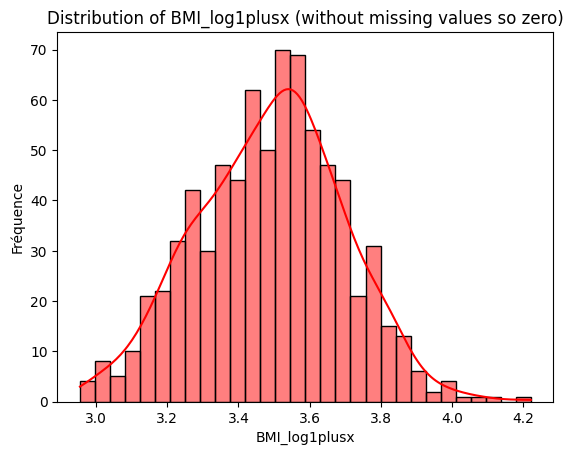

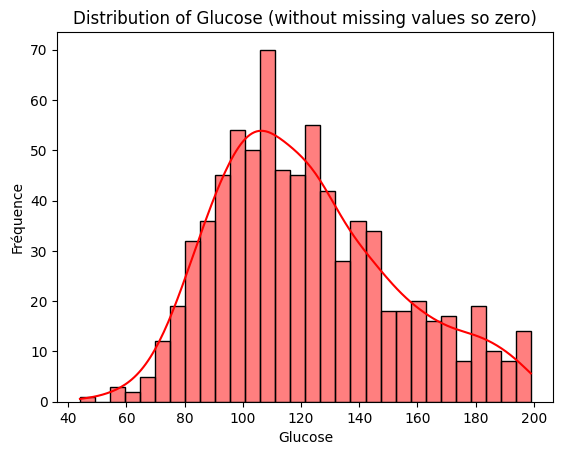

In [7]:
columns_to_visualize = ['Insulin_log1plusx', 'Insulin', 'SkinThickness', 'SkinThickness_log1plusx', 'Pregnancies', 'Pregnancies_yeo-johnson', 'BloodPressure', 'BMI', 'BMI_log1plusx', 'Glucose'] 

# Loop through each column and plot its distribution (excluding zeros)
for column in columns_to_visualize:
    if column == 'Pregnancies_yeo-johnson':
        sns.histplot(data_diabetes['Pregnancies_yeo-johnson'], bins=30, kde=True, color='red')
        plt.title(f"Distribution of {column} ")
        plt.xlabel(column)
        plt.ylabel("Fréquence")
        plt.show()
    elif column == 'Pregnancies':
        sns.histplot(data_diabetes['Pregnancies'], bins=30, kde=True, color='red')
        plt.title(f"Distribution of {column} ")
        plt.xlabel(column)
        plt.ylabel("Fréquence")
        plt.show()
    else:
        sns.histplot(data_diabetes[data_diabetes[column] > 0][column], bins=30, kde=True, color='red')
        plt.title(f"Distribution of {column} (without missing values so zero)")
        plt.xlabel(column)
        plt.ylabel("Fréquence")
        plt.show()